In [1]:
!pip install --upgrade pymilvus==2.4.5 "pymilvus[model]"

  Using cached pymilvus-2.4.5-py3-none-any.whl.metadata (5.6 kB)
Using cached pymilvus-2.4.5-py3-none-any.whl (197 kB)
  Attempting uninstall: pymilvus
    Found existing installation: pymilvus 2.4.7
    Uninstalling pymilvus-2.4.7:
      Successfully uninstalled pymilvus-2.4.7


In [2]:
!pip remove pymilvus

ERROR: unknown command "remove"


In [3]:
!pip freeze | grep pymilvus

pymilvus==2.4.5


In [4]:
 !pip install -U pymilvus

  Using cached pymilvus-2.4.7-py3-none-any.whl.metadata (5.6 kB)
Using cached pymilvus-2.4.7-py3-none-any.whl (198 kB)
  Attempting uninstall: pymilvus
    Found existing installation: pymilvus 2.4.5
    Uninstalling pymilvus-2.4.5:
      Successfully uninstalled pymilvus-2.4.5


In [5]:
import pandas as pd

In [6]:
data = pd.read_csv('data_with_image_descriptions.csv')

data

,Unnamed: 0,reviewed claim,unverified claim,similarity,country,lang,author name,cr_item_reviewed_text,cr_image,local_image_path,claims,image_description
0,0,reviewed claim: Dióxido de cloro ayuda a sanar...,unverified claim: El dióxido de cloro ayuda a ...,Both claims are similar,Mexico,es,AFP Factual,Dióxido de cloro ayuda a sanar esclerosis múlt...,https://factual.afp.com/sites/default/files/st...,NaN,reviewed claim: Dióxido de cloro ayuda a sanar...,NaN
1,1,reviewed claim: El dióxido de cloro tiene prop...,unverified claim: El dióxido de cloro ayuda a ...,Both claims are similar,Spain,es,Europa Press,El dióxido de cloro tiene propiedades curativas,https://img.europapress.es/fotoweb/fotonoticia...,cr_images/06700810-4374-73d2-8000-e477c442f105...,reviewed claim: El dióxido de cloro tiene prop...,The image depicts a laboratory setting where a...
2,2,reviewed claim: Centenas de pilotos de avião p...,unverified claim: Pilotos de aviación se manif...,Both claims are similar,Portugal,pt,Polígrafo - SAPO,Centenas de pilotos de avião protestam contra ...,https://thumbs.web.sapo.io/?W=1200&H=630&delay...,cr_images/06700810-4e14-75a7-8000-56f45415027b,reviewed claim: Centenas de pilotos de avião p...,The image depicts a group of airline pilots st...
3,3,reviewed claim: Delta Pilots In Video Were Pro...,unverified claim: Pilotos de aviación se manif...,Both claims are similar,United States,en,Lead Stories,Delta Pilots In Video Were Protesting COVID-19...,https://leadstories.com/caption_3479196.jpg,cr_images/06700810-5781-71ed-8000-140fe51b8d46...,reviewed claim: Delta Pilots In Video Were Pro...,"The image depicts a scene of a protest, likely..."
4,4,reviewed claim: Des pilotes de Delta Airlines ...,unverified claim: Pilotos de aviación se manif...,Both claims are similar,France,fr,AFP Factuel,Des pilotes de Delta Airlines manifestent cont...,https://factuel.afp.com/sites/default/files/st...,NaN,reviewed claim: Des pilotes de Delta Airlines ...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3863,3863,"reviewed claim: “Mejores salarios, menos impue...",unverified claim: el 50% del deposito de cualq...,Claims are not similar,Mexico,es,AFP Factual,"“Mejores salarios, menos impuestos"", dice vall...",https://factual.afp.com/sites/default/files/st...,NaN,"reviewed claim: “Mejores salarios, menos impue...",NaN
3864,3864,reviewed claim: Video muestra el robo de un ve...,unverified claim: el 50% del deposito de cualq...,Claims are not similar,Mexico,es,AFP Factual,Video muestra el robo de un vehículo en Quito,https://factual.afp.com/sites/default/files/st...,NaN,reviewed claim: Video muestra el robo de un ve...,NaN
3865,3865,"reviewed claim: Si ganas un dólar al año, paga...",unverified claim: el 50% del deposito de cualq...,Claims are not similar,Mexico,es,AFP Factual,"Si ganas un dólar al año, pagas 60 dólares de ...",https://factual.afp.com/sites/default/files/st...,NaN,"reviewed claim: Si ganas un dólar al año, paga...",NaN
3866,3866,reviewed claim: “Somos el país que más ha incr...,unverified claim: el 50% del deposito de cualq...,Claims are not similar,NaN,es,Newtral,“Somos el país que más ha incrementado los imp...,NaN,NaN,reviewed claim: “Somos el país que más ha incr...,NaN


In [7]:
data['local_image_path'].fillna('').apply(lambda x: len(x) > 0).value_counts()

local_image_path
False    2011
True     1857
Name: count, dtype: int64

In [8]:
data['image_description'].fillna('').apply(lambda x: len(x) > 0).value_counts()

image_description
False    2022
True     1846
Name: count, dtype: int64

In [9]:
data['image_description'][11]

'The image features a split-screen composition. On the left side, a news anchor, presumably Anderson Cooper, is seen delivering a news segment. He has a serious expression and is dressed in a dark suit with a light-colored shirt. The background is a blurred newsroom setting, suggesting a live broadcast.\n\nOn the right side of the image, there is a close-up of a person\'s arm, which appears to show signs of distress or a medical condition, possibly related to myocarditis. The skin tone is light, and the arm is partially obscured, focusing on the area that seems affected.\n\nOverlaying the entire image is a bold, red "FAKE" stamp, indicating that the information being presented may be misleading or false. The text at the bottom of the image reads "BREAKING NEWS" and includes a headline stating "UKRAINE INVASION CAUSING MYOCARDITIS," along with a timestamp indicating it is live news.\n\nThe overall tone of the image suggests a critical examination of the news being reported, emphasizing 

In [10]:
data['image_description'] = data['image_description'].fillna('').apply(lambda x: 'Related Image: '+x if len(x) > 1 else '')
data['text'] = data['claims'] + '\n' + data['similarity'] + data['image_description']

In [11]:
data = data[data['text'].fillna('').apply(len) > 1]
country_list = data['country'].fillna("Unknown")
author_name_list = data['author name'].fillna("Unknown")
image_paths_list = list(data['local_image_path'].fillna(''))


In [12]:
print(data['text'][0])


reviewed claim: Dióxido de cloro ayuda a sanar esclerosis múltiple, ela y otras patologías
unverified claim: El dióxido de cloro ayuda a sanar la esclerósis múltiple
Both claims are similar


In [13]:
docs = list(data['text'])
docs[:3]

['reviewed claim: Dióxido de cloro ayuda a sanar esclerosis múltiple, ela y otras patologías\nunverified claim: El dióxido de cloro ayuda a sanar la esclerósis múltiple\nBoth claims are similar',
 "reviewed claim: El dióxido de cloro tiene propiedades curativas\nunverified claim: El dióxido de cloro ayuda a sanar la esclerósis múltiple\nBoth claims are similarRelated Image: The image depicts a laboratory setting where a scientist is engaged in an experiment. The main focus is on a male scientist, who is wearing protective gear, including safety goggles, a face mask, and blue gloves. He is intently looking at a pipette as he prepares to add a liquid to a series of test tubes arranged in a rack in front of him.\n\nThe background features a blurred laboratory environment, suggesting a professional and sterile atmosphere. The test tubes contain various colored liquids, predominantly shades of blue, green, and purple, indicating different chemical substances. The scientist's concentration i

<Axes: ylabel='Frequency'>

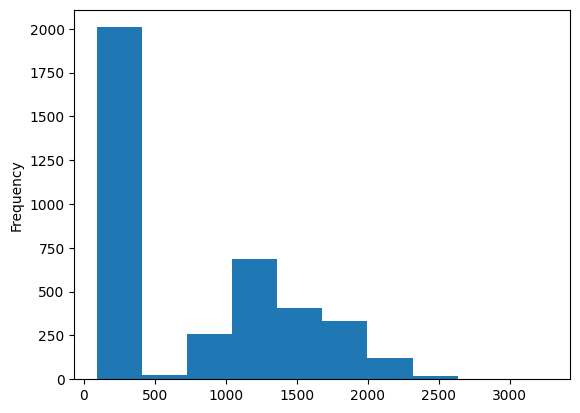

In [14]:
data['text'].apply(len).plot.hist()

In [15]:
import torch
DIMENSION=2048
# Load the embedding model with the last layer removed
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', pretrained=True)
model = torch.nn.Sequential(*(list(model.children())[:-1]))
model.eval()

Using cache found in /home/dreiriz/.cache/torch/hub/pytorch_vision_v0.10.0


Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


In [16]:
from torchvision import transforms

# Preprocessing for images
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [17]:
from PIL import Image
import glob
from tqdm import tqdm

def embed(data):
    with torch.no_grad():
        ret = model(torch.stack(data))
        # If more than one image, use squeeze
        if len(ret) > 1:
            return ret.squeeze().tolist()[0]
        # Squeeze would remove batch for single image, so using flatten
        else:
            return torch.flatten(ret, start_dim=1).tolist()[0]


# Get the filepaths of the images
paths = glob.glob('./cr_images/*', recursive=True)
dict_img_embd = {}

for path in tqdm(paths):
    try:
        im = Image.open(path).convert('RGB')
        result = preprocess(im)
        result = embed([result])
        file_name = path.split("cr_images/")[1]
        dict_img_embd[file_name] = result
        #    data_batch = [[],[]]
    except:
        print("Error processing image")


  0%|          | 2/1860 [00:00<05:22,  5.75it/s]

Error processing image


  7%|▋         | 126/1860 [00:11<02:37, 10.99it/s]/home/dreiriz/Descargas/multimodal_rag_dataset.csv/env/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
 20%|█▉        | 365/1860 [00:30<01:35, 15.62it/s]

Error processing image


 21%|██        | 393/1860 [00:32<01:54, 12.77it/s]

Error processing image


 23%|██▎       | 431/1860 [00:36<01:51, 12.79it/s]

Error processing image


 24%|██▎       | 438/1860 [00:36<01:34, 15.00it/s]

Error processing image


 29%|██▊       | 534/1860 [00:44<01:42, 12.89it/s]

Error processing image


 31%|███▏      | 583/1860 [00:47<01:27, 14.53it/s]

Error processing image


 53%|█████▎    | 992/1860 [01:20<00:55, 15.62it/s]

Error processing image


 55%|█████▌    | 1027/1860 [01:23<00:57, 14.51it/s]

Error processing image


 58%|█████▊    | 1080/1860 [01:27<00:49, 15.75it/s]

Error processing image


 83%|████████▎ | 1541/1860 [02:04<00:22, 14.22it/s]

Error processing image


100%|██████████| 1860/1860 [02:30<00:00, 12.38it/s]


In [18]:
image_vector = data['local_image_path'].fillna('').apply(lambda x: x.replace("cr_images/","")).apply(lambda x: dict_img_embd[x] if x in dict_img_embd else None)

In [19]:
from milvus_model.hybrid import BGEM3EmbeddingFunction

ef = BGEM3EmbeddingFunction(use_fp16=False, device="cpu")
dense_dim = ef.dim["dense"]

# Generate embeddings using BGE-M3 model
docs_embeddings = ef(docs)

Fetching 30 files:   0%|          | 0/30 [00:00<?, ?it/s]

/home/dreiriz/Descargas/multimodal_rag_dataset.csv/env/lib/python3.11/site-packages/FlagEmbedding/BGE_M3/modeling.py:335: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  colbe

In [ ]:
try:
    connections.disconnect("default")
except:
    print("Can't disconnect")

try:
    client.disconnect("default")
except:
    print("Can't disconnect")

In [21]:
milvus_db = "milvus_demo_5.db"
milvus_collection = milvus_db.split(".")[0]

In [22]:
from pymilvus import MilvusClient

client = MilvusClient(milvus_db)

In [33]:
if client.has_collection(collection_name=milvus_collection):
    client.drop_collection(collection_name=milvus_collection)


In [34]:
from pymilvus import (
    connections,
    utility,
    FieldSchema,
    CollectionSchema,
    DataType,
    Collection,
)
# Specify the data schema for the new Collection
fields = [
    # Use auto generated id as primary key
    FieldSchema(
        name="pk", dtype=DataType.VARCHAR, is_primary=True, auto_id=True, max_length=100
    ),
    # Store the original text to retrieve based on semantically distance
    FieldSchema(name="text", dtype=DataType.VARCHAR, max_length=3000),
    # Milvus now supports both sparse and dense vectors,
    # we can store each in a separatdir(e field to conduct hybrid search on both vectors
    #FieldSchema(name="sparse_vector", dtype=DataType.SPARSE_FLOAT_VECTOR),
    FieldSchema(name="dense_vector", dtype=DataType.FLOAT_VECTOR, dim=dense_dim),
    FieldSchema(name="image_vector", dtype=DataType.FLOAT_VECTOR, dim=DIMENSION),
    FieldSchema(name="local_image", dtype=DataType.VARCHAR, max_length=512),
    FieldSchema(name="country", dtype=DataType.VARCHAR, max_length=512),
    FieldSchema(name="author_name", dtype=DataType.VARCHAR, max_length=512)
]
schema = CollectionSchema(fields, enable_dynamic_field=True)

In [35]:
index_params = client.prepare_index_params()

# index_params.add_index(
#     field_name="sparse_vector",
#     index_type="SPARSE_INVERTED_INDEX",
#     metric_type="IP"
# )

index_params.add_index(
    field_name="dense_vector", 
    index_type="AUTOINDEX",
    metric_type="IP",
)

index_params.add_index(
    field_name="image_vector", 
    index_type="AUTOINDEX",
    metric_type="L2"
)



In [36]:
import time
client.create_collection(
    collection_name=milvus_collection,
    schema=schema,
    index_params=index_params
)



In [ ]:
res = client.get_load_state(
    collection_name=milvus_collection
)

print(res)

In [ ]:
print(res)

In [ ]:
type(docs[0])

In [ ]:
type(docs_embeddings["dense"][0])

In [ ]:
type(docs_embeddings["sparse"].toarray()[0])

In [ ]:
type(image_paths_list[0])

In [44]:
image_vector = [ [.0]*DIMENSION if vector is None else vector for vector in image_vector]

for i in range(0, len(docs)):
    insert_data = {
        'text': docs[i],
        #'sparse_vector': docs_embeddings["sparse"][0,:],
        'dense_vector': docs_embeddings["dense"][i],
        'image_vector':image_vector[i],
        'local_image': image_paths_list[i],
        'country': country_list[i],
        'author_name': author_name_list[i],
     }


    client.insert(collection_name=milvus_collection, data=insert_data)

In [45]:
#client.insert(collection_name=milvus_collection , data = [insert_data])

In [32]:
from tqdm import tqdm

In [33]:
# For efficiency, we insert 50 records in each small batch
# for i in tqdm(range(0, len(docs), 50)):
#     batched_entities = [
#         docs[i : i + 50],
#         docs_embeddings["sparse"][i : i + 50],
#         docs_embeddings["dense"][i : i + 50],
#         image_paths_list[i : i + 50],
#     ]
#    
#     col.insert(batched_entities)
# print("Number of entities inserted:", col.num_entities)

In [34]:
# Enter your search query
query = "La reina Isabel II alimenta niños como animales"

# Generate embeddings for the query
query_embeddings = ef([query])
# print(query_embeddings)

In [35]:
from pymilvus import (
    AnnSearchRequest,
    WeightedRanker,
)


def dense_search(col, query_dense_embedding, limit=10):
    search_params = {
        "metric_type": "IP",
        "params": {
            "radius": 0.6,
        }}
    res = client.search(
        collection_name=milvus_collection,
        data=[query_dense_embedding],
        anns_field="dense_vector",
        limit=limit,
        output_fields=["text","local_image"],
        search_params=search_params,
        
    )
    return res[0]


def sparse_search(col, query_sparse_embedding, limit=10):
    search_params = {
        "metric_type": "IP",
        "params": {
            "radius": 0.8,
        },
    }
    res = connection.search(
        [query_sparse_embedding],
        anns_field="sparse_vector",
        limit=limit,
        output_fields=["text",""],
        param=search_params,
    )[0]
    return res


def hybrid_search(
    col,
    query_dense_embedding,
    query_sparse_embedding,
    sparse_weight=1.0,
    dense_weight=1.0,
    limit=10,
):
    dense_search_params = {"metric_type": "IP", "params": {}}
    dense_req = AnnSearchRequest(
        [query_dense_embedding], "dense_vector", dense_search_params, limit=limit
    )
    sparse_search_params = {"metric_type": "IP", "params": {}}
    sparse_req = AnnSearchRequest(
        [query_sparse_embedding], "sparse_vector", sparse_search_params, limit=limit
    )
    rerank = WeightedRanker(sparse_weight, dense_weight)
    res = col.hybrid_search(
        [sparse_req, dense_req], rerank=rerank, limit=limit, output_fields=["text"], radius=0.7
    )[0]
    return res

In [ ]:
dense_results = dense_search(col, query_embeddings["dense"][0])
# sparse_results = sparse_search(col, query_embeddings["sparse"][[0]])
# hybrid_results = hybrid_search(
#     col,
#     query_embeddings["dense"][0],
#     query_embeddings["sparse"][[0]],
#     sparse_weight=0.7,
#     dense_weight=1.0,
# )

In [ ]:
dense_results